# Phasic activation of striatal neurons ( silent to probablistic activation)

GPe and SNr receive 60pA and 30pA excitation, respectively.
If SNr is receives too much excitation, disinhibition does not occur

In [31]:
spk_gp=[];
spk_snr=[];
spk_str=[];
Isnr_net=[];
dt=0.0001; % 0.1ms integration steps

%Runs 5s simulation without external current measure the baseline activity.  
[g_gp2snr] = BGdelayline_setinit2('I_exc_gp',60); % initial conductance of gp to snr synapses 

for l = 1:100
%Silent striatum, testing different constant excitatory input to GPe
[Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('n',100,'stimCellsPer',0,'I_exc_gp',60,'I_exc_snr',40,...
'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'connectivity','all');

meanIsnr = mean(mean(Isnr(:,end-1/dt:end))); %average net inhibition exerted by GPe to SNr
Isnr_net = [Isnr_net, meanIsnr]; %makes an array of average inhibition across trials

spk_gp = [spk_gp; Vm_gp==15]; %binary spike array
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
end



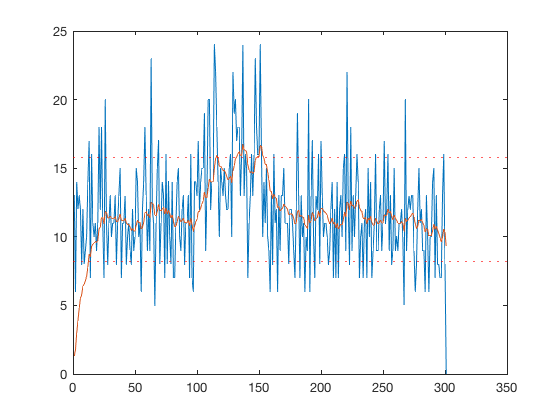

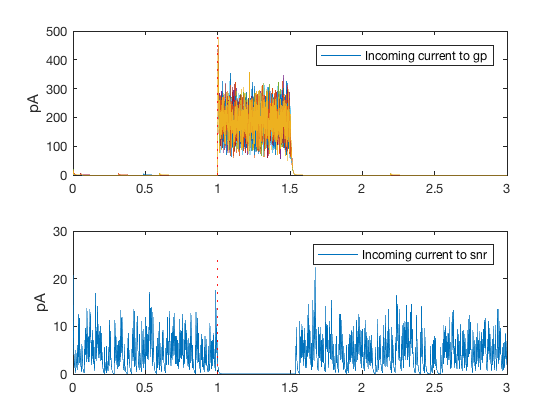

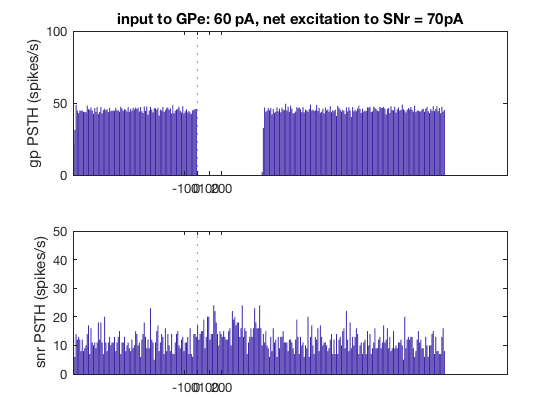

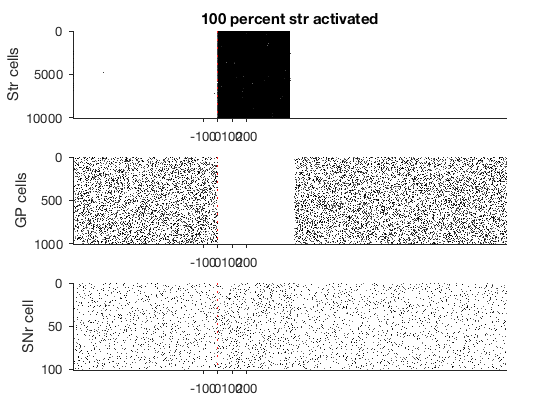

In [40]:
%%Plot
figure(1)
subplot(3,1,1)
plotRaster(spk_str);
title(sprintf('%d percent str activated',100))
ylabel('Str cells')
vline(1)
xlabel('')
%xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})

subplot(3,1,2)
plotRaster(spk_gp);
ylabel('GP cells')
vline(1)
xlabel('')
%xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})

subplot(3,1,3)
plotRaster(spk_snr);
ylabel('SNr cell')
vline(1)
xlabel('')
%xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})

binWidth = 100; %0.1 ms

t_bar = 1:binWidth:length(spk_snr);
psth_gp = zeros(1,length(t_bar));
psth_snr = zeros(1,length(t_bar));

for psth_i = 1:length(t_bar)-1

    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
    psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
end

figure(2)
%fr_gp = mean(psth_gp(find(1<=t_bar_gp*0.0001<=3)))/(size(spk_gp,1)*(binWidth_gp*0.0001));
subplot(2,1,1)
bar((binWidth/2+t_bar-1)*0.0001,psth_gp/(size(spk_gp,1)*(binWidth*0.0001)))

ylabel('gp PSTH (spikes/s)')
ylim([0 100])
vline(1)
%xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})
title(sprintf('input to GPe: %d pA, net excitation to SNr = 70pA',60))

subplot(2,1,2)
bar((binWidth/2+t_bar-1)*0.0001,psth_snr/(size(spk_snr,1)*(binWidth*0.0001)))
ylim([0 50])
vline(1)
%xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})
ylabel('snr PSTH (spikes/s)')

[M,I]=max(psth_snr(2:end));
tdelay = t_bar(I)*dt;

figure(3)
subplot(2,1,1)
plot(linspace(0,3,length(Igp)),Igp')
ylabel('pA')
vline(1)
legend('Incoming current to gp')

subplot(2,1,2)
plot(linspace(0,3,length(Igp)),Isnr(1,:))
ylabel('pA')
legend('Incoming current to snr')
vline(1)

figure(4)
X=psth_snr/(size(spk_snr,1)*(binWidth*0.0001));

plot(X)
hold on
plot(filter(1/10, [1 1/10-1],X))
hline(mean(X)+std(X,1))
hline(mean(X)-std(X,1))



When no Str is activated. 

In [38]:
clear all

dt=0.0001; % 0.1ms integration steps

%Runs 5s simulation without external current measure the baseline activity.  
[g_gp2snr] = BGdelayline_setinit2('I_exc_gp',60); % initial conductance of gp to snr synapses 

parfor l = 1:100
%Silent striatum, testing different constant excitatory input to GPe
[Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('n',100,'stimCellsPer',0,'I_exc_gp',60,'I_exc_snr',40,...
'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'connectivity','all');

spk_gp{l} = Vm_gp==15; %binary spike array
spk_snr{l}=  Vm_snr==15;
spk_str{l}= Vm_str==15;
end

%%
spk_snr = transpose(double(reshape(cell2mat(spk_snr),[30002, 100])));


Starting parallel pool (parpool) using the 'local' profile ...
> In verifyTimeZone (line 23)
  In datetime (line 515)
  In parallel.internal.cluster.DefaultProperties.getNewJobPropStruct (line 16)
  In parallel.internal.cluster.CJSSupport/buildJob (line 158)
  In parallel.cluster.CJSCluster/buildCommunicatingJob (line 465)
  In parallel.Cluster/createCommunicatingJob (line 92)
  In parallel.internal.pool.InteractiveClient>iCreateCommunicatingJob (line 715)
  In parallel.internal.pool.InteractiveClient/start (line 325)
  In parallel.Pool>iStartClient (line 593)
  In parallel.Pool.hBuildPool (line 472)
  In parallel.internal.pool.doParpool (line 18)
  In parpool (line 89)
  In parallel.internal.pool.PoolArrayManager.getOrAutoCreateWithCleanup (line 49)
  In pctTryCreatePoolIfNecessary (line 23)
  In distcomp.remoteparfor.tryRemoteParfor
  In parallel_function (line 433)
connected to 4 workers.



ans =

        1024


ans =

   512


avg =

   10.8067


stdev =

    4.7357



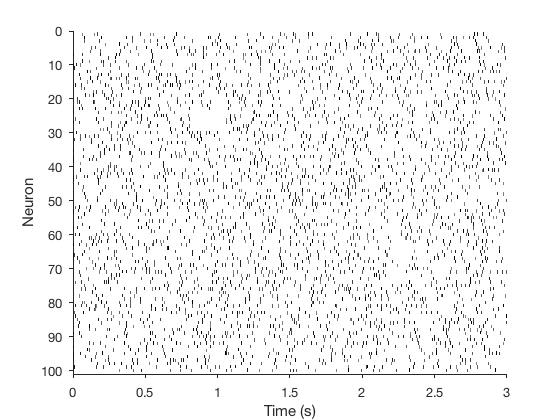

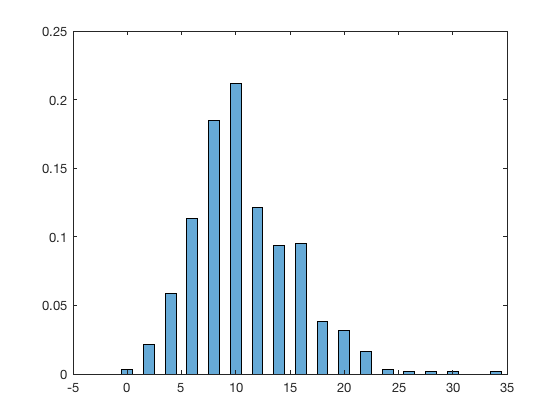

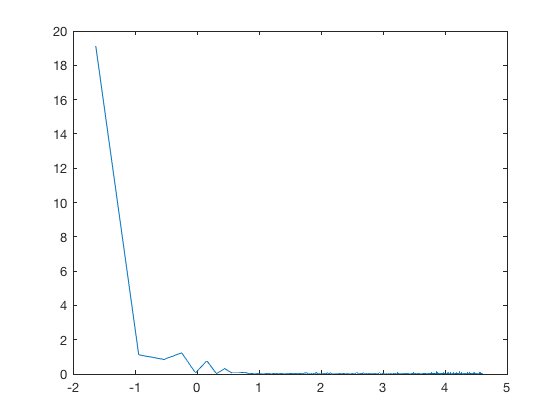

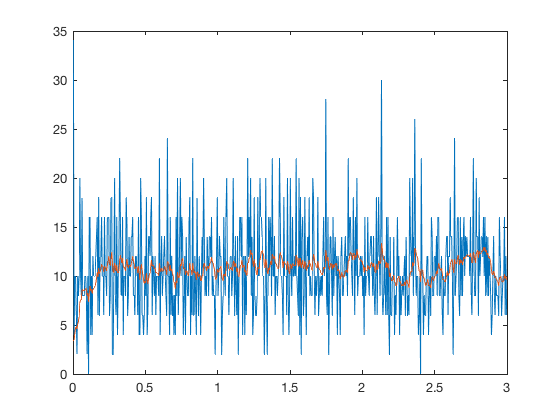

In [39]:
binWidth = 50; %0.1 ms

t_bar = 1:binWidth:length(spk_snr);
%psth_gp = zeros(1,length(t_bar));
psth_snr = zeros(1,length(t_bar));

for psth_i = 1:length(t_bar)-1

    %psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
    psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
end

figure;
X=psth_snr(1:end-1)/(size(spk_snr,1)*(binWidth*0.0001));
plot((binWidth/2+t_bar(1:end-1)-1)*0.0001,X)
hold on;
plot((binWidth/2+t_bar(1:end-1)-1)*0.0001,filter(1/10, [1 1/10-1],X))

L = length(X);
Fs = 1/(binWidth*0.0001);% sampling rate

y = fft(X,1024);
P = y.*conj(y)/(1024*L);
length(y)

figure;
f = (0:1024/2-1)*Fs/1024;        % Frequency vector
length(f)
plot(log(f),P(1:1024/2))


figure;X=psth_snr/(size(spk_snr,1)*(binWidth*0.0001));
histogram(X(1:end-1),'Normalization','probability')

avg=mean(X(1:end-1))
stdev=std(X(1:end-1))


figure;
plotRaster(spk_snr)



In [30]:
clear all

dt=0.0001; % 0.1ms integration steps

%Runs 5s simulation without external current measure the baseline activity.  
[g_gp2snr] = BGdelayline_setinit2('I_exc_gp',60); % initial conductance of gp to snr synapses 

parfor l = 1:100
%Silent striatum, testing different constant excitatory input to GPe
[Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('n',100,'stimCellsPer',100,'I_exc_gp',60,'I_exc_snr',40,...
'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'connectivity','all');

spk_gp{l} = Vm_gp==15; %binary spike array
spk_snr{l}=  Vm_snr==15;
spk_str{l}= Vm_str==15;
end

%%
spk_snr = transpose(double(reshape(cell2mat(spk_snr),[30002, 100])));



ans =

        1024


ans =

   512


avg =

   12.0500


stdev =

    5.3987



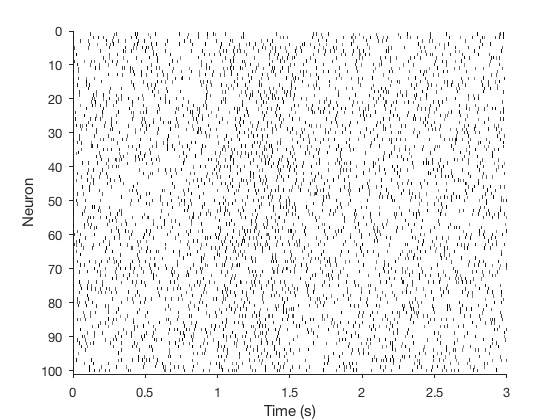

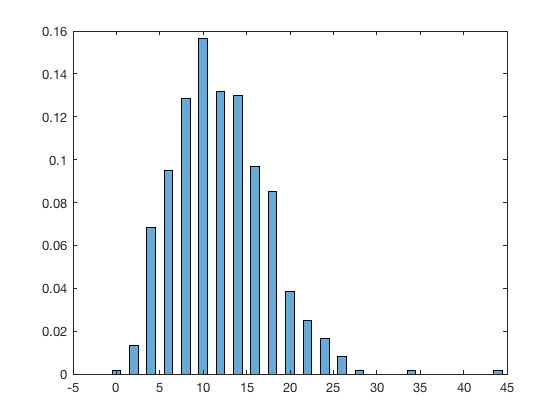

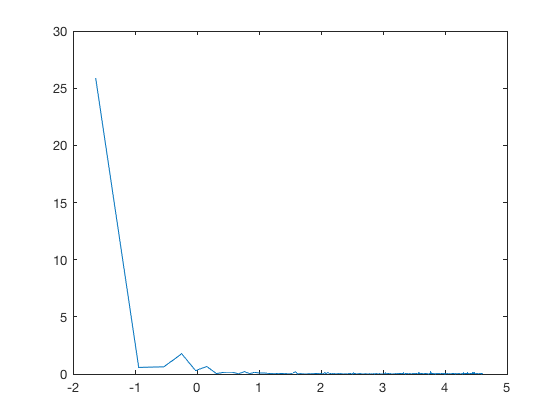

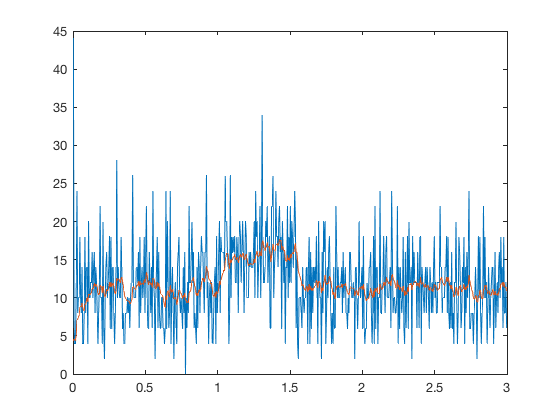

In [37]:
binWidth = 50; %0.1 ms

t_bar = 1:binWidth:length(spk_snr);
%psth_gp = zeros(1,length(t_bar));
psth_snr = zeros(1,length(t_bar));

for psth_i = 1:length(t_bar)-1

    %psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
    psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
end
figure;
X=psth_snr(1:end-1)/(size(spk_snr,1)*(binWidth*0.0001));
plot((binWidth/2+t_bar(1:end-1)-1)*0.0001,X)
hold on;
plot((binWidth/2+t_bar(1:end-1)-1)*0.0001,filter(1/10, [1 1/10-1],X))

L = length(X);
Fs = 1/(binWidth*0.0001);% sampling rate

y = fft(X,1024);
P = y.*conj(y)/(1024*L);
length(y)

figure;
f = (0:1024/2-1)*Fs/1024;        % Frequency vector
length(f)
plot(log(f),P(1:1024/2))


figure;X=psth_snr/(size(spk_snr,1)*(binWidth*0.0001));
histogram(X(1:end-1),'Normalization','probability')

avg=mean(X(1:end-1))
stdev=std(X(1:end-1))


figure;
plotRaster(spk_snr)

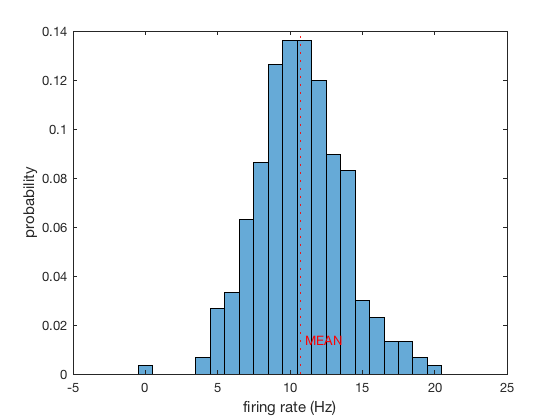

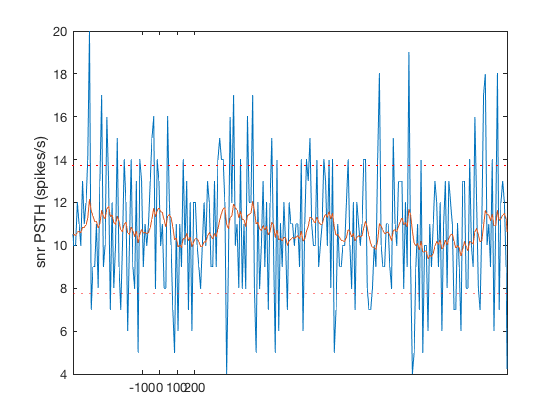

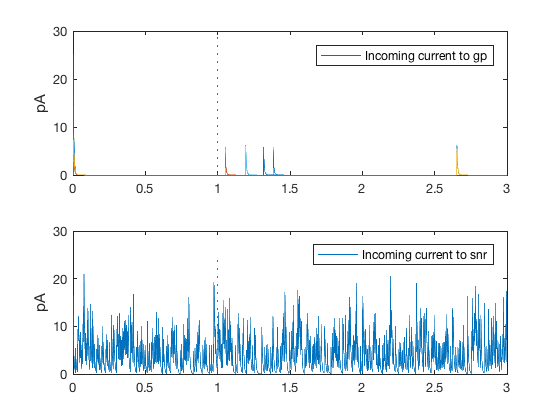

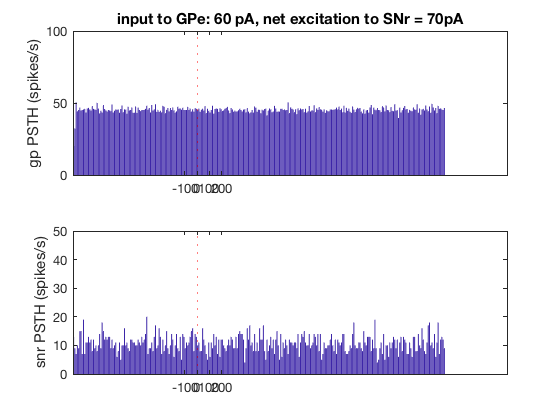

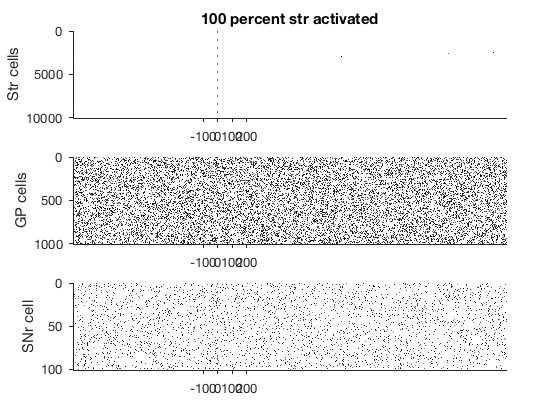

In [10]:
%%Plot
figure(1)
subplot(3,1,1)
plotRaster(spk_str);
title(sprintf('%d percent str activated',100))
ylabel('Str cells')
vline(1)
xlabel('')
%xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})

subplot(3,1,2)
plotRaster(spk_gp);
ylabel('GP cells')
vline(1)
xlabel('')
%xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})

subplot(3,1,3)
plotRaster(spk_snr);
ylabel('SNr cell')
vline(1)
xlabel('')
%xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})

binWidth = 100; %0.1 ms

t_bar = 1:binWidth:length(spk_snr);
psth_gp = zeros(1,length(t_bar));
psth_snr = zeros(1,length(t_bar));

for psth_i = 1:length(t_bar)-1

    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
    psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
end

figure(2)
%fr_gp = mean(psth_gp(find(1<=t_bar_gp*0.0001<=3)))/(size(spk_gp,1)*(binWidth_gp*0.0001));
subplot(2,1,1)
bar((binWidth/2+t_bar-1)*0.0001,psth_gp/(size(spk_gp,1)*(binWidth*0.0001)))

ylabel('gp PSTH (spikes/s)')
ylim([0 100])
vline(1)
%xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})
title(sprintf('input to GPe: %d pA, net excitation to SNr = 70pA',60))

subplot(2,1,2)
bar((binWidth/2+t_bar-1)*0.0001,psth_snr/(size(spk_snr,1)*(binWidth*0.0001)))
ylim([0 50])
vline(1)
%xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})
ylabel('snr PSTH (spikes/s)')

[M,I]=max(psth_snr(2:end));
tdelay = t_bar(I)*dt;

figure(3)
subplot(2,1,1)
plot(linspace(0,3,length(Igp)),Igp')
ylabel('pA')
vline(1)
legend('Incoming current to gp')

subplot(2,1,2)
plot(linspace(0,3,length(Igp)),Isnr(1,:))
ylabel('pA')
legend('Incoming current to snr')
vline(1)

figure(4)
X=psth_snr/(size(spk_snr,1)*(binWidth*0.0001));
plot((binWidth/2+t_bar-1)*0.0001,X)
hold on
plot((binWidth/2+t_bar-1)*0.0001,filter(1/10, [1 1/10-1],X))
hline(mean(X)+2.58*std(X,1))
hline(mean(X)-2.58*std(X,1))
xlim([0.5 3])
xticks([0.5 1 1 2])
xticklabels({'-500','0','1000','2000'})
ylabel('snr PSTH (spikes/s)')

figure(5)
histogram(X,'Normalization','probability')
xlabel('firing rate (Hz)')
ylabel('probability')
vline(mean(X),'r:','MEAN')


In [11]:
spk_gp=[];
spk_snr=[];
spk_str=[];
Isnr_net=[];
dt=0.0001; % 0.1ms integration steps

%Runs 5s simulation without external current measure the baseline activity.  
[g_gp2snr] = BGdelayline_setinit2('I_exc_gp',60); % initial conductance of gp to snr synapses 

for l = 1:100
%Silent striatum, testing different constant excitatory input to GPe
[Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('n',100,'stimCellsPer',70,'I_exc_gp',60,'I_exc_snr',40,...
'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'connectivity','all');

spk_gp = [spk_gp; Vm_gp==15]; %binary spike array
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
end



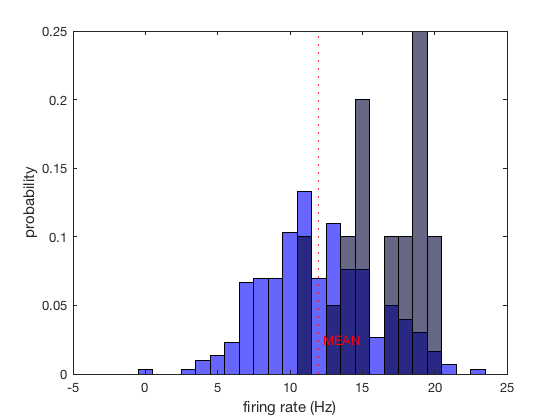

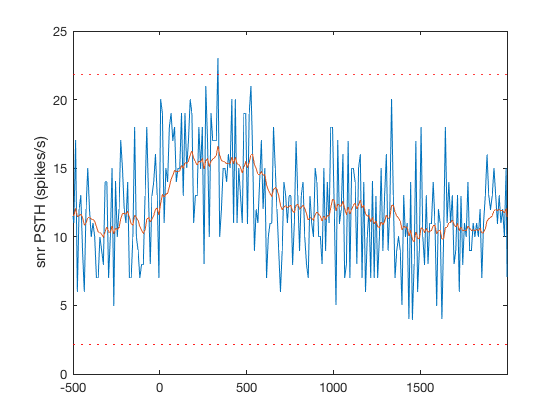

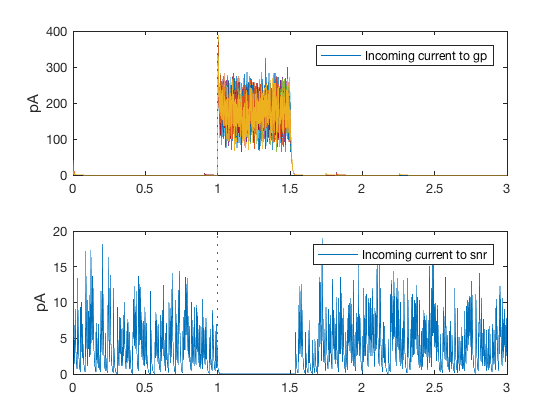

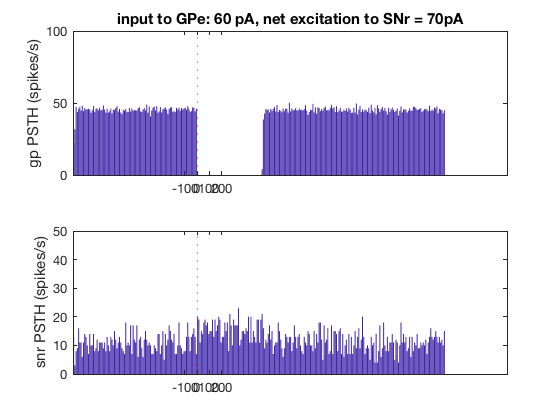

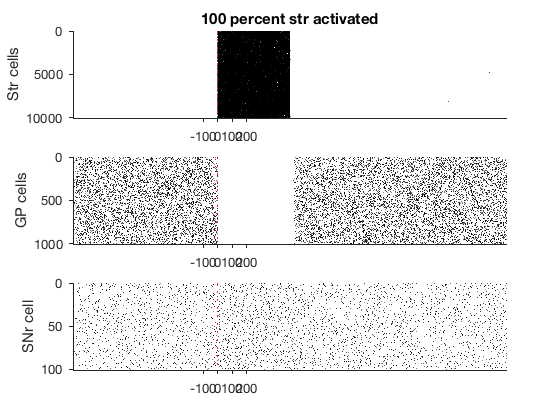

In [25]:
%%Plot
figure(1)
subplot(3,1,1)
plotRaster(spk_str);
title(sprintf('%d percent str activated',100))
ylabel('Str cells')
vline(1)
xlabel('')
%xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})

subplot(3,1,2)
plotRaster(spk_gp);
ylabel('GP cells')
vline(1)
xlabel('')
%xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})

subplot(3,1,3)
plotRaster(spk_snr);
ylabel('SNr cell')
vline(1)
xlabel('')
%xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})

binWidth = 100; %0.1 ms

t_bar = 1:binWidth:length(spk_snr);
psth_gp = zeros(1,length(t_bar));
psth_snr = zeros(1,length(t_bar));

for psth_i = 1:length(t_bar)-1

    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
    psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
end

figure(2)
%fr_gp = mean(psth_gp(find(1<=t_bar_gp*0.0001<=3)))/(size(spk_gp,1)*(binWidth_gp*0.0001));
subplot(2,1,1)
bar((binWidth/2+t_bar-1)*0.0001,psth_gp/(size(spk_gp,1)*(binWidth*0.0001)))

ylabel('gp PSTH (spikes/s)')
ylim([0 100])
vline(1)
%xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})
title(sprintf('input to GPe: %d pA, net excitation to SNr = 70pA',60))

subplot(2,1,2)
bar((binWidth/2+t_bar-1)*0.0001,psth_snr/(size(spk_snr,1)*(binWidth*0.0001)))
ylim([0 50])
vline(1)
%xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})
ylabel('snr PSTH (spikes/s)')

[M,I]=max(psth_snr(2:end));
tdelay = t_bar(I)*dt;

figure(3)
subplot(2,1,1)
plot(linspace(0,3,length(Igp)),Igp')
ylabel('pA')
vline(1)
legend('Incoming current to gp')

subplot(2,1,2)
plot(linspace(0,3,length(Igp)),Isnr(1,:))
ylabel('pA')
legend('Incoming current to snr')
vline(1)

figure(4)
X=psth_snr/(size(spk_snr,1)*(binWidth*0.0001));
plot((binWidth/2+t_bar-1)*0.0001,X)
hold on
plot((binWidth/2+t_bar-1)*0.0001,filter(1/10, [1 1/10-1],X))
hline(mean(X)+2.58*std(X,1))
hline(mean(X)-2.58*std(X,1))
xlim([0.5 3])
xticks([0.5 1 1.5 2 2.5])
xticklabels({'-500','0','500','1000','1500','2000'})
ylabel('snr PSTH (spikes/s)')


figure(5)
histogram(X,'Normalization','probability','FaceColor',[0 0 1])
hold on
histogram(X(101:120),'Normalization','probability','FaceColor',[0 0 1/5])
xlabel('firing rate (Hz)')
ylabel('probability')
vline(mean(X),'r:','MEAN')


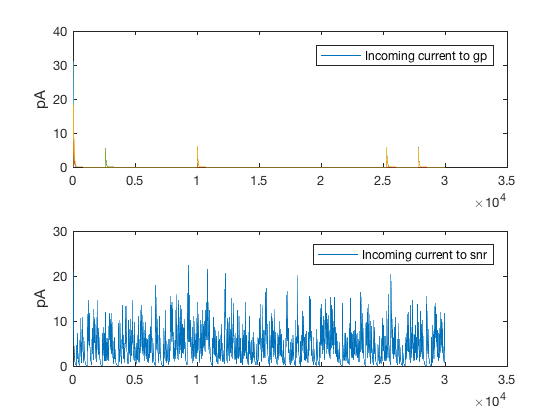

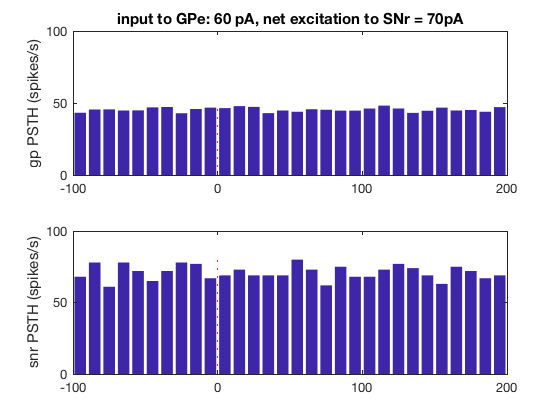

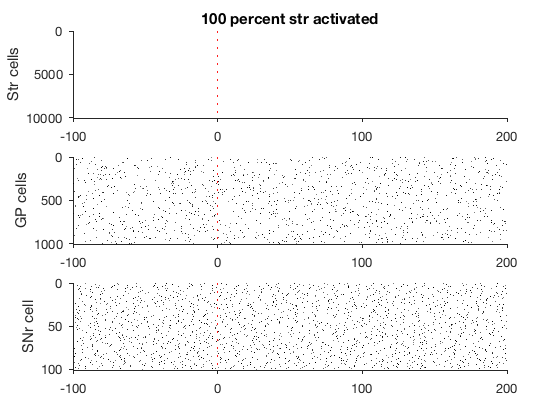

In [4]:
spk_gp=[];
spk_snr=[];
spk_str=[];
Isnr_net=[];
dt=0.0001; % 0.1ms integration steps

%Runs 5s simulation without external current measure the baseline activity.  
[g_gp2snr] = BGdelayline_setinit2('I_exc_gp',60,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

for l = 1:100
%Silent striatum, testing different constant excitatory input to GPe
[Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('stimCellsPer',0,'I_exc_gp',60,'I_exc_snr',70,'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr);

meanIsnr = mean(mean(Isnr(:,end-1/dt:end))); %average net inhibition exerted by GPe to SNr
Isnr_net = [Isnr_net, meanIsnr]; %makes an array of average inhibition across trials

spk_gp = [spk_gp; Vm_gp==15]; %binary spike array
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
end

%fr_gp(i) = sum(sum(spk_gp(:,end-1/dt:end)))/size(spk_gp,1); %average GPe firing rate during the last 1s in simulation - from 100 cells.
%
%y(i) = mean(Isnr_net);
%e(i) = std(Isnr_net);

%%Plot
figure(1)
subplot(3,1,1)
plotRaster(spk_str);
title(sprintf('%d percent str activated',100))
ylabel('Str cells')
vline(1)
xlabel('')
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})

subplot(3,1,2)
plotRaster(spk_gp);
ylabel('GP cells')
vline(1)
xlabel('')
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})

subplot(3,1,3)
plotRaster(spk_snr);
ylabel('SNr cell')
vline(1)
xlabel('')
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})

binWidth = 100; %0.1 ms

t_bar = 1:binWidth:length(spk_snr);
psth_gp = zeros(1,length(t_bar));
psth_snr = zeros(1,length(t_bar));

for psth_i = 1:length(t_bar)-1

    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
    psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
end

figure(2)
%fr_gp = mean(psth_gp(find(1<=t_bar_gp*0.0001<=3)))/(size(spk_gp,1)*(binWidth_gp*0.0001));
subplot(2,1,1)
bar((binWidth/2+t_bar-1)*0.0001,psth_gp/(size(spk_gp,1)*(binWidth*0.0001)))

ylabel('gp PSTH (spikes/s)')
ylim([0 100])
vline(1)
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})
title(sprintf('input to GPe: %d pA, net excitation to SNr = 70pA',60))

subplot(2,1,2)
bar((binWidth/2+t_bar-1)*0.0001,psth_snr/(size(spk_snr,1)*(binWidth*0.0001)))
ylim([0 100])
vline(1)
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})
ylabel('snr PSTH (spikes/s)')

[M,I]=max(psth_snr(2:end));
tdelay = t_bar(I)*dt;

figure(3)
subplot(2,1,1)
plot(Igp')
vline(1)
ylabel('pA')
legend('Incoming current to gp')

subplot(2,1,2)
plot(Isnr(1,:))
vline(1)
ylabel('pA')
legend('Incoming current to snr')




# SNr response time after Str activation 

I test the latency of SNr phasic firing when Str is activated between the range of 50% to 100%


tdelay =

  Columns 1 through 7

       NaN    1.3950    1.3650    1.2650    1.0450    1.3450    1.1950
       NaN    1.2850    1.0250       NaN    1.2050    1.2250    1.2150
    1.0950    1.3450    1.0850    1.2350       NaN    1.1050       NaN
    1.3550    1.3550       NaN    1.2050       NaN       NaN    1.2350
       NaN       NaN    1.2950       NaN       NaN    1.3450    1.0250
    1.4250       NaN    1.3350    1.3850       NaN    1.2950    1.0350
       NaN    1.1950    1.4850       NaN    1.0350    1.0850       NaN
       NaN    1.1750    1.4150    1.2350       NaN       NaN    1.2350
       NaN       NaN       NaN    1.1750       NaN    1.1650       NaN
       NaN       NaN    1.3350       NaN    1.4550    1.0050    1.2950

  Columns 8 through 11

       NaN    1.1550       NaN    1.0250
    1.1250       NaN    1.1050    1.0450
       NaN       NaN    1.3750    1.1350
    1.0450       NaN    1.4250    1.1250
       NaN    1.3750    1.2750       NaN
       NaN    1.4750      

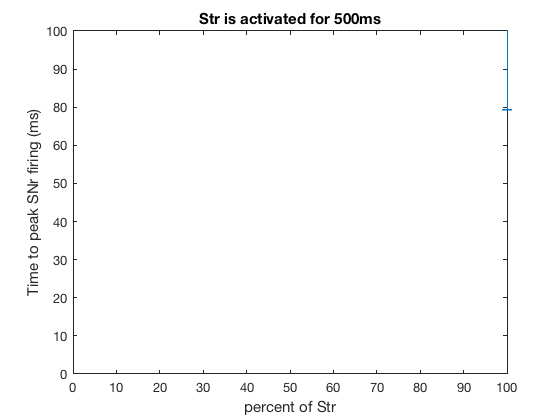

In [26]:
StimStr = 80; % phasic activation of striatum amount

tdelay=zeros(10,length(StimStr));
for m = 1:length(StimStr)

for sim_i =1:10

clear spk_snr
dt=0.0001; % 0.1ms integration steps

%Runs 5s simulation without external current measure the baseline activity.  
[g_gp2snr] = BGdelayline_setinit2('I_exc_gp',80,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

    parfor l = 1:10
    %Silent striatum, testing different constant excitatory input to GPe
    [~,Vm_snr,~, ~, ~] = BGdelayline('n',100,'stimCellsPer',StimStr(m),'I_exc_gp',80,'I_exc_snr',50,...
    'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'connectivity','all');

    %meanIsnr = mean(mean(Isnr(:,end-1/dt:end))); %average net inhibition exerted by GPe to SNr
    %Isnr_net = [Isnr_net, meanIsnr]; %makes an array of average inhibition across trials

    spk_snr{l,1} = Vm_snr==15;

    end

    spk_str = double(cell2mat(spk_str));
    
    binWidth_snr = 500; %ms
    t_bar = 1:binWidth_snr:length(spk_snr);
    psth_snr = zeros(1,length(t_bar));

    for psth_j = 1:length(t_bar)-1
    psth_snr(psth_j) = sum(sum(spk_snr(:,t_bar(psth_j):(t_bar(psth_j)+binWidth-1))));
    end

    binloc = (binWidth/2+t_bar-1)*0.0001;

    [M,I]=max(psth_snr);

    if binloc(I)>1 & binloc(I)<1.5
        tdelay(sim_i,m) = binloc(I);
    else
        tdelay(sim_i,m) = NaN;
    end

end
end
tdelay

figure
errorbar(StimStr,nanmean(tdelay,1),nanstd(tdelay,1)./sqrt(sum(~isnan(tdelay),1)));
xlabel('percent of Str')
ylabel('Time to peak SNr firing (ms)' )
ylim([1 1.5])
yticks(linspace(1,1.5,11))
yticklabels({'0','50','100','150','200','250','300','350','400','450','500'})
title('Str is activated for 500ms')


Detect phasic activation by doing confidence interval test

In [ ]:
StimStr = 10:10:100; % phasic activation of striatum amount

thr=zeros(5,length(StimStr));
for m = 1:length(StimStr)

for sim_i =1:5

%spk_gp=[];
spk_snr=[];
%spk_str=[];
%Isnr_net=[];
dt=0.0001; % 0.1ms integration steps

%Runs 5s simulation without external current measure the baseline activity.  
[g_gp2snr] = BGdelayline_setinit2('I_exc_gp',60,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

    for l = 1:10
    %Silent striatum, testing different constant excitatory input to GPe
    [~,Vm_snr,~, ~, ~] = BGdelayline('n',1000,'stimCellsPer',StimStr(m),'I_exc_gp',60,'I_exc_snr',70,...
    'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'connectivity','random');

    %meanIsnr = mean(mean(Isnr(:,end-1/dt:end))); %average net inhibition exerted by GPe to SNr
    %Isnr_net = [Isnr_net, meanIsnr]; %makes an array of average inhibition across trials

    spk_snr = [spk_snr; Vm_snr==15];

    end

    binWidth_snr = 100; %ms
    t_bar = 1:binWidth_snr:length(spk_snr);
    psth_snr = zeros(1,length(t_bar));

    for psth_j = 1:length(t_bar)-1
    psth_snr(psth_j) = sum(sum(spk_snr(:,t_bar(psth_j):(t_bar(psth_j)+binWidth-1))));
    end

    X = psth_snr/(size(spk_snr,1)*(binWidth*0.0001));
    
    
    Xmean(sim_i,m) = mean(X(t_bar*0.0001<1));
    Xstd(sim_i,m) = std(X(t_bar*0.0001<1),1); % normalized by number of observations N 
    
    CI(sim_i,m) = 2.58*Xstd(sim_i,m);
    


    binloc = (binWidth/2+t_bar-1)*0.0001;

    [M,I]=max(psth_snr);

    if binloc(I)>1 & binloc(I)<1.2
        tdelay(sim_i,m) = binloc(I);
    else
        tdelay(sim_i,m) = NaN;
    end

end
end
tdelay

figure
errorbar(StimStr,nanmean(tdelay,1),nanstd(tdelay,1)./sqrt(sum(~isnan(tdelay),1)));
xlabel('percent of Str')
ylabel('Time to peak SNr firing (ms)' )
ylim([1 1.1])
yticks(linspace(1,1.1,10))
yticklabels({'0','10','20','30','40','50','60','80','90','100'})
title('response time when initially silent Str is phasically activated ')


Surprisingly, percentage of Str cells affects the response time. The SEM is pretty large, compared to the SEM seen in varying excitatory input current to SNr directly.

## What do the inhibitory currents look like when Str is activated (from silence) vs. phasic firing?



# Phasic change from 10% activation to 100% activation

In [ ]:
StimStr = 50:10:100; % phasic activation of striatum amount

for m = 1:length(StimStr)

for sim_i =1:10

%spk_gp=[];
spk_snr=[];
%spk_str=[];
%Isnr_net=[];
dt=0.0001; % 0.1ms integration steps

%Runs 5s simulation without external current measure the baseline activity.  
[g_gp2snr] = BGdelayline_setinit2('I_exc_gp',60,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

for l = 1:100
%Silent striatum, testing different constant excitatory input to GPe
[~,Vm_snr,~, ~, ~] = BGdelayline_basalStrFiring('stimCellsPer',StimStr(m),'I_exc_gp',60,'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr);

%meanIsnr = mean(mean(Isnr(:,end-1/dt:end))); %average net inhibition exerted by GPe to SNr
%Isnr_net = [Isnr_net, meanIsnr]; %makes an array of average inhibition across trials

spk_snr = [spk_snr; Vm_snr==15];

end

binWidth_snr = 150; %ms
t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_j = 1:length(t_bar_snr)-1
psth_snr(psth_j) = sum(sum(spk_snr(:,t_bar_snr(psth_j):(t_bar_snr(psth_j)+binWidth_snr-1))));
end

[M,I]=max(psth_snr(2:end));
tdelay(sim_i,m) = t_bar_snr(I)*dt;

end
end
figure
errorbar(StimStr,mean(tdelay,1),std(tdelay,1)/sqrt(size(tdelay,1)))
xlabel('percent of Str')
ylabel('Time of peak SNr firing (s)' )
ylim([1 1.05])
title('response time when initially silent Str is phasically activated ')